In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [49]:
df = pd.read_csv('Dataset/transaction_merged.csv')
df['OPERATION_DATE'] = pd.to_datetime(df['OPERATION_DATE'])

df.columns

Index(['ID', 'COMPANY', 'BRANCH', 'OPERATION_CORE_ID', 'PRODUCT_ID',
       'OPERATION_CODE', 'OPERATION_DATE', 'CURRENCY', 'CURRENCY_AMOUNT',
       'AMOUNT', 'ACCOUNT_ID', 'CUST_ID', 'DEBIT_CREDIT_FLAG',
       'TRANSACTION_REF', 'RISK_LEVEL', 'STATE', 'FISCAL_COUNTRY', 'OPEN_DATE',
       'ACCOUNT_CURRENCY', 'BALANCE', 'ACCOUNT_TYPE', 'PRODUCT_CODE'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49861 entries, 0 to 49860
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 49861 non-null  object        
 1   COMPANY            49861 non-null  object        
 2   BRANCH             49861 non-null  object        
 3   OPERATION_CORE_ID  49861 non-null  object        
 4   PRODUCT_ID         49861 non-null  int64         
 5   OPERATION_CODE     49861 non-null  int64         
 6   OPERATION_DATE     49861 non-null  datetime64[ns]
 7   CURRENCY           49861 non-null  object        
 8   CURRENCY_AMOUNT    49861 non-null  float64       
 9   AMOUNT             49861 non-null  float64       
 10  ACCOUNT_ID         49861 non-null  int64         
 11  CUST_ID            49861 non-null  int64         
 12  DEBIT_CREDIT_FLAG  49861 non-null  object        
 13  TRANSACTION_REF    49861 non-null  object        
 14  RISK_L

In [51]:
df['DEBIT_CREDIT_FLAG']=df['DEBIT_CREDIT_FLAG'].replace('d','D')


In [52]:
df.describe()

,PRODUCT_ID,OPERATION_CODE,OPERATION_DATE,CURRENCY_AMOUNT,AMOUNT,ACCOUNT_ID,CUST_ID,RISK_LEVEL,BALANCE,ACCOUNT_TYPE,PRODUCT_CODE
count,49861.000000,49861.00000,49861,4.986100e+04,4.986100e+04,4.986100e+04,4.986100e+04,49861.000000,4.965400e+04,49670.000000,49670.000000
mean,5705.279758,2986.07571,2022-11-26 06:00:16.894967808,1.021659e+05,1.031681e+05,1.063598e+10,1.001773e+06,79.738714,4.597961e+05,5705.446165,5705.446165
min,1001.000000,1.00000,2021-08-13 00:00:00,9.000000e-02,1.000000e-02,1.000000e+10,1.000005e+06,26.000000,-3.021846e+06,1001.000000,1001.000000
25%,6001.000000,833.00000,2021-12-10 00:00:00,1.000000e+02,1.155700e+02,1.000000e+10,1.000326e+06,68.000000,0.000000e+00,6001.000000,6001.000000
50%,6003.000000,5025.00000,2022-11-01 00:00:00,3.271380e+03,3.430000e+03,1.000001e+10,1.000891e+06,83.000000,8.105700e+02,6003.000000,6003.000000
75%,6003.000000,5028.00000,2023-11-27 00:00:00,7.900000e+04,8.000000e+04,1.000002e+10,1.003047e+06,93.000000,1.151407e+05,6003.000000,6003.000000
max,6008.000000,5045.00000,2024-05-17 00:00:00,5.000000e+07,5.000000e+07,8.000000e+10,1.005888e+06,100.000000,5.004606e+07,6008.000000,6008.000000
std,799.453801,2173.01781,NaN,6.784419e+05,6.802242e+05,6.641850e+09,1.703679e+03,16.805734,2.773985e+06,797.170434,797.170434


In [53]:
df_credit = df[df['DEBIT_CREDIT_FLAG'] == 'C']
# print(df_credit.head())
print(df.describe())

         PRODUCT_ID  OPERATION_CODE                 OPERATION_DATE  \
count  49861.000000     49861.00000                          49861   
mean    5705.279758      2986.07571  2022-11-26 06:00:16.894967808   
min     1001.000000         1.00000            2021-08-13 00:00:00   
25%     6001.000000       833.00000            2021-12-10 00:00:00   
50%     6003.000000      5025.00000            2022-11-01 00:00:00   
75%     6003.000000      5028.00000            2023-11-27 00:00:00   
max     6008.000000      5045.00000            2024-05-17 00:00:00   
std      799.453801      2173.01781                            NaN   

       CURRENCY_AMOUNT        AMOUNT    ACCOUNT_ID       CUST_ID  \
count     4.986100e+04  4.986100e+04  4.986100e+04  4.986100e+04   
mean      1.021659e+05  1.031681e+05  1.063598e+10  1.001773e+06   
min       9.000000e-02  1.000000e-02  1.000000e+10  1.000005e+06   
25%       1.000000e+02  1.155700e+02  1.000000e+10  1.000326e+06   
50%       3.271380e+03  3.430

In [54]:
df_debit = df[df['DEBIT_CREDIT_FLAG'] == 'D']
df_debit.head()

,ID,COMPANY,BRANCH,OPERATION_CORE_ID,PRODUCT_ID,OPERATION_CODE,OPERATION_DATE,CURRENCY,CURRENCY_AMOUNT,AMOUNT,...,DEBIT_CREDIT_FLAG,TRANSACTION_REF,RISK_LEVEL,STATE,FISCAL_COUNTRY,OPEN_DATE,ACCOUNT_CURRENCY,BALANCE,ACCOUNT_TYPE,PRODUCT_CODE
1,0004105b89b24a3ba35cca84282f21d4,A,A,198422458543585.010002,5001,5025,2022-04-12,USD,1993.01,1993.01,...,D,BNK22102HJLFLLGF,82,NaN,PR,2022-03-16 00:00:00.000,USD,8176657.43,5001.0,5001.0
2,0008361946ac48e4b190887ab1f64f01,A,A,F20230613.20253237702783302,6001,5025,2023-06-13,USD,100000.00,100000.00,...,D,BNK23164MJDJ0MDL,100,GYEONGGIDO,KR,2021-09-30 00:00:00.000,USD,5954488.69,6001.0,6001.0
3,00154f2102374563b28783ccbad383a7,A,A,205298009845918.010001,5001,5025,2024-03-15,EUR,300000.00,355350.00,...,D,BNK24075JLHMJBBM,100,NaN,LT,2023-12-21 00:00:00.000,EUR,-162166.55,5001.0,5001.0
4,00260536e84c4e818af7eacc58df947e,A,A,205505486832926.020001,6001,833,2024-04-02,USD,1050.00,1050.00,...,D,CHG2409620670,100,NEVIS,KN,2024-01-03 00:00:00.000,USD,45600.00,6001.0,6001.0
5,002708a13bd64f5da963148e970c5afa,A,A,205697690339258.170001,6001,816,2024-04-22,USD,300.00,300.00,...,D,FT24115H89W3,58,CALIFORNIA,US,2024-04-04 00:00:00.000,USD,7400.00,6001.0,6001.0


In [55]:
df_credit = df[df['DEBIT_CREDIT_FLAG'] == 'C']
df_credit.head()

,ID,COMPANY,BRANCH,OPERATION_CORE_ID,PRODUCT_ID,OPERATION_CODE,OPERATION_DATE,CURRENCY,CURRENCY_AMOUNT,AMOUNT,...,DEBIT_CREDIT_FLAG,TRANSACTION_REF,RISK_LEVEL,STATE,FISCAL_COUNTRY,OPEN_DATE,ACCOUNT_CURRENCY,BALANCE,ACCOUNT_TYPE,PRODUCT_CODE
0,000303c8cdbf40e2a8af49089629c6ae,A,A,204175051344051.000001,6003,5028,2023-11-24,USD,200000.0,200000.00,...,C,DC233280001006002,60,NaN,CY,2021-08-13 00:00:00.000,USD,0.0,6003.0,6003.0
9,0062ebbb68874cc3ad94910513781caf,A,A,199811986054970.000001,6003,5028,2022-09-14,USD,200000.0,200000.00,...,C,DC222570001002002,60,NaN,CY,2021-08-13 00:00:00.000,USD,0.0,6003.0,6003.0
10,0063cb782a3f420c8a0eebca509968c4,A,A,205345374971866.010001,6003,890,2021-09-13,EUR,14160.0,16081.61,...,C,AAACT24080MJMGMBTL,87,NaN,MY,2021-08-13 00:00:00.000,EUR,0.0,6003.0,6003.0
11,006b13cd7657422ca393a6004a37c3eb,A,A,205342554778541.010001,6001,890,2023-10-17,USD,100.0,100.00,...,C,AAACT2408098VPL9Y0,62,NEVIS,PL,2023-09-21 00:00:00.000,USD,0.0,6001.0,6001.0
13,006e809c42374790a0f05e108d44cda0,A,A,196257153324472.000001,6003,890,2021-09-23,USD,115000.0,115000.00,...,C,AAACT21266V004VD13,68,NaN,KN,2021-08-13 00:00:00.000,USD,0.0,6003.0,6003.0


## Top 1000 largest amount w.r.t to ACCOUNT_ID

In [70]:
top_1000_transactions_credit = df_credit.nlargest(1000, 'AMOUNT')[['ACCOUNT_ID','AMOUNT','OPERATION_DATE']]
top_1000_transactions_credit

,ACCOUNT_ID,AMOUNT,OPERATION_DATE
37186,10000009259,50000000.00,2021-12-21
46461,10000018614,34036891.80,2022-12-30
14205,10000002408,22303642.09,2021-09-08
4015,10000019145,20000000.00,2023-10-12
5385,10000019145,20000000.00,2023-10-12
...,...,...,...
22128,10000010297,400000.00,2022-05-10
22265,10000003568,400000.00,2022-11-28
22551,10000010297,400000.00,2022-05-10
22581,10000018892,400000.00,2023-09-12


In [71]:
top_1000_transactions_debit = df_debit.nlargest(50, 'AMOUNT')[['ACCOUNT_ID','AMOUNT','OPERATION_DATE']]
top_1000_transactions_debit

,ACCOUNT_ID,AMOUNT,OPERATION_DATE
27489,10000011528,50000000.00,2021-12-21
30618,10000011528,40000000.00,2021-12-22
29780,10000015647,20825764.61,2022-04-01
4606,80000000242,20628329.42,2022-12-30
269,10000018614,20000000.00,2023-10-12
3696,10000019145,20000000.00,2023-10-12
19118,10000019145,20000000.00,2023-10-12
20663,10000019145,20000000.00,2023-10-12
27801,10000019145,20000000.00,2023-10-12
29781,10000019145,20000000.00,2023-10-12


## Visualization 

In [73]:
# account_transactions_credit = top_1000_transactions_credit[top_50_transactions_credit['ACCOUNT_ID']=='10000010297']

# account_transactions_debit = top_1000_transactions_debit[top_50_transactions_debit['ACCOUNT_ID']=='10000011528']

In [89]:
monthly_summary_credit = top_1000_transactions_credit.groupby(['ACCOUNT_ID', pd.Grouper(key='OPERATION_DATE', freq='M')])['AMOUNT'].sum().unstack(fill_value=0).reset_index()
# print(monthly_summary_credit.shape)
monthly_summary_debit = top_1000_transactions_debit.groupby(['ACCOUNT_ID', pd.Grouper(key='OPERATION_DATE', freq='M')])['AMOUNT'].sum().unstack(fill_value=0).reset_index()
# print(monthly_summary_debit.shape)

print(monthly_summary_credit['ACCOUNT_ID'].value_counts().sum())
print(monthly_summary_debit.value_counts().sum())





161
15


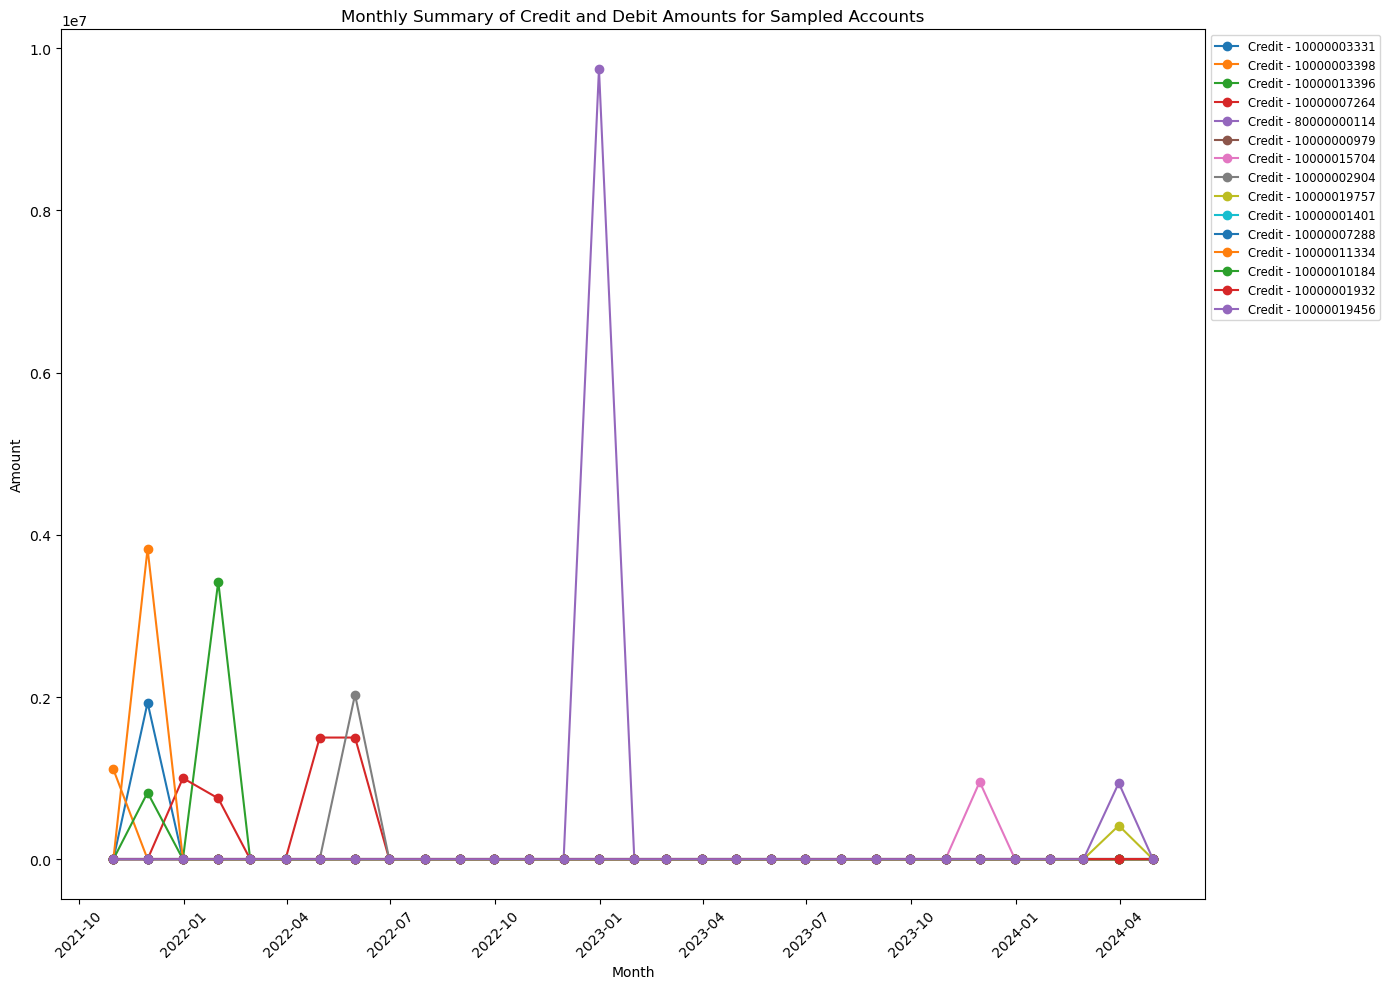

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

sampled_accounts_credit = monthly_summary_credit['ACCOUNT_ID'].sample(15, random_state=1)

# Filter the data for the sampled accounts

credit_sample = monthly_summary_credit[monthly_summary_credit['ACCOUNT_ID'].isin(sampled_accounts_credit)].set_index('ACCOUNT_ID')

# Plotting

plt.figure(figsize=(14, 10))

for account_id in sampled_accounts_credit:
    if account_id in credit_sample.index:
        plt.plot(credit_sample.columns[1:], credit_sample.loc[account_id, credit_sample.columns[1:]], marker='o', linestyle='-', label=f'Credit - {account_id}')

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Summary of Credit and Debit Amounts for Sampled Accounts')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()


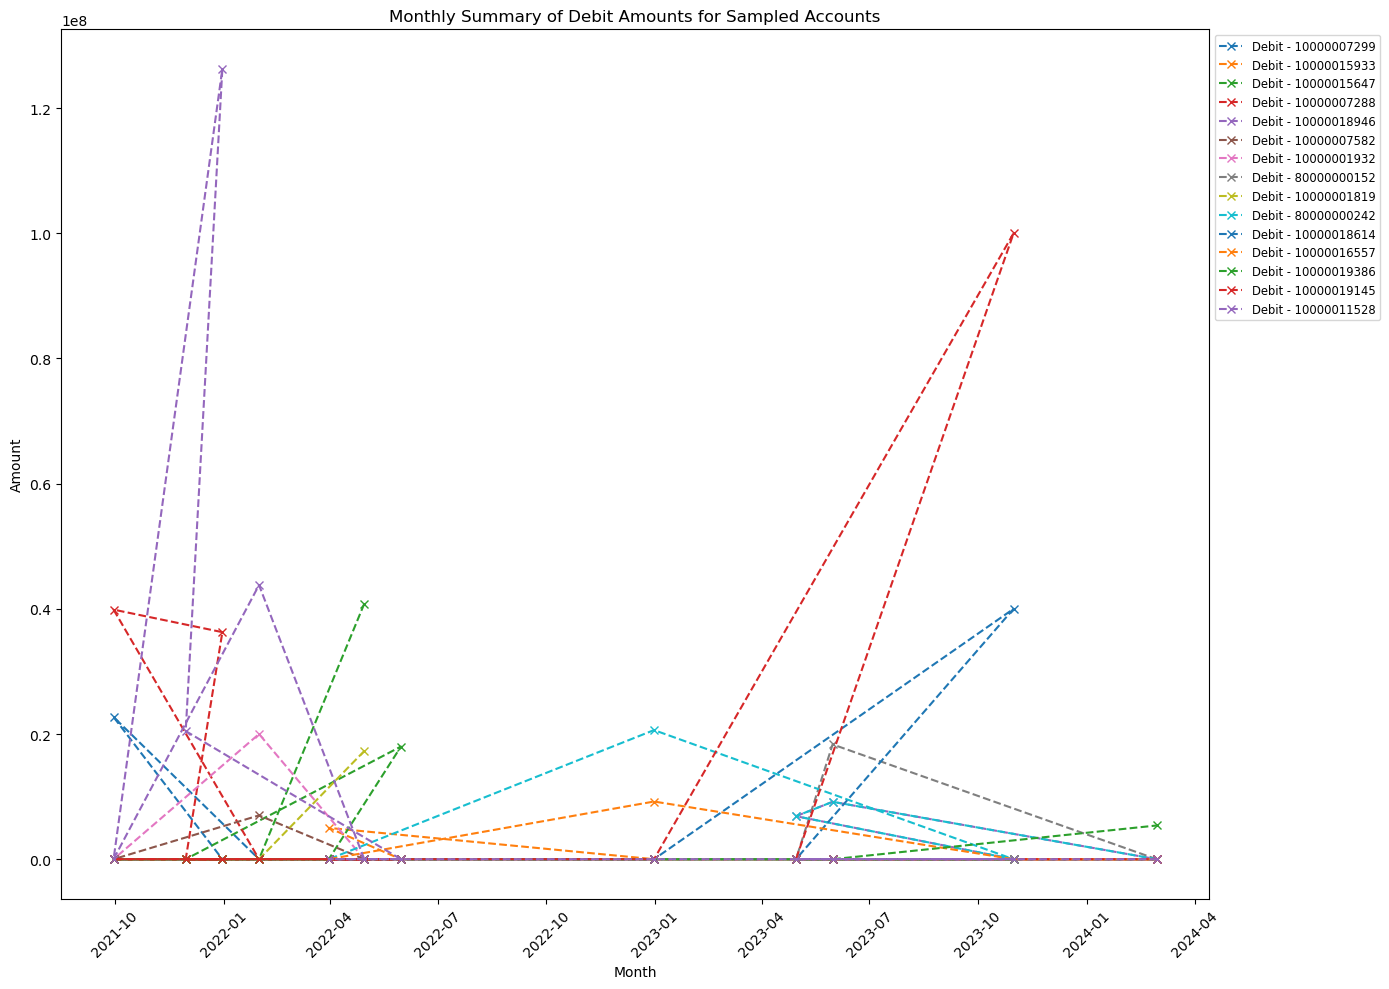

In [108]:
sampled_accounts_debit = monthly_summary_debit['ACCOUNT_ID'].sample(15, random_state=1)
debit_sample = monthly_summary_debit[monthly_summary_debit['ACCOUNT_ID'].isin(sampled_accounts_debit)].set_index('ACCOUNT_ID')

plt.figure(figsize=(14, 10))

for account_id in sampled_accounts_debit:
    # Plot debit data
    if account_id in debit_sample.index:
        plt.plot(debit_sample.columns[1:], debit_sample.loc[account_id, debit_sample.columns[1:]], marker='x', linestyle='--', label=f'Debit - {account_id}')

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Summary of Debit Amounts for Sampled Accounts')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()
